In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [4]:
train.head()

,WELLNUM,DEPTH,DTC,DTS,BS,CALI,DEN,DENC,GR,NEU,PEF,RDEP,RMED,ROP,PHIF,SW,VSH
0,0,335.16,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,5.33,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00
1,0,335.66,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,5.82,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00
2,0,336.16,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,6.52,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00
3,0,336.66,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,7.23,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00
4,0,337.16,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,9.50,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00


In [5]:
train.describe()

,WELLNUM,DEPTH,DTC,DTS,BS,CALI,DEN,DENC,GR,NEU,PEF,RDEP,RMED,ROP,PHIF,SW,VSH
count,318967.00,318967.00,318967.00,318967.00,318967.00,318967.00,318967.00,318967.00,318967.00,318967.00,318967.00,318967.00,318967.00,318967.00,318967.00,318967.00,318967.00
mean,4.08,6998.18,-7791.05,-8605.14,-958.27,-6982.04,-7000.76,-7205.37,-43.03,-7007.12,-7221.97,-949.84,-804.02,-989.37,-8515.78,-8515.69,-8585.16
std,2.46,3797.94,4168.06,3491.48,2969.16,4592.48,4582.29,4486.57,990.10,4578.76,4480.14,2944.07,4177.16,3028.43,3554.02,3554.22,3484.04
min,0.00,335.16,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00
25%,2.00,3757.87,-9999.00,-9999.00,8.50,-9999.00,-9999.00,-9999.00,23.33,-9999.00,-9999.00,0.65,0.67,15.20,-9999.00,-9999.00,-9999.00
50%,4.00,6905.18,-9999.00,-9999.00,17.50,-9999.00,-9999.00,-9999.00,55.51,-9999.00,-9999.00,1.10,1.15,24.97,-9999.00,-9999.00,-9999.00
75%,6.00,10052.49,-9999.00,-9999.00,26.00,8.56,2.25,0.03,78.98,0.09,0.06,2.02,2.15,30.63,-9999.00,-9999.00,-9999.00
max,8.00,15651.58,181.81,388.84,36.00,20.33,3.09,0.33,1124.44,1.46,13.84,80266.80,97543.40,208.63,0.40,1.00,3.65


In [6]:
train.WELLNUM.value_counts() * 100/len(train)

6   14.38
7   13.73
4   12.22
5   11.22
2   10.93
1   10.77
3   10.25
0    9.33
8    7.17
Name: WELLNUM, dtype: float64

In [35]:
train.replace(['-9999', -9999], np.nan, inplace=True)
test.replace(['-9999', -9999], np.nan, inplace=True)

train.head()

,WELLNUM,DEPTH,DTC,DTS,BS,CALI,DEN,DENC,GR,NEU,PEF,RDEP,RMED,ROP,PHIF,SW,VSH,all_null
0,0,335.16,nan,nan,nan,nan,nan,nan,5.33,nan,nan,nan,nan,nan,nan,nan,nan,True
1,0,335.66,nan,nan,nan,nan,nan,nan,5.82,nan,nan,nan,nan,nan,nan,nan,nan,True
2,0,336.16,nan,nan,nan,nan,nan,nan,6.52,nan,nan,nan,nan,nan,nan,nan,nan,True
3,0,336.66,nan,nan,nan,nan,nan,nan,7.23,nan,nan,nan,nan,nan,nan,nan,nan,True
4,0,337.16,nan,nan,nan,nan,nan,nan,9.50,nan,nan,nan,nan,nan,nan,nan,nan,True


In [8]:
train.WELLNUM.value_counts()

6    45874
7    43786
4    38971
5    35790
2    34871
1    34361
3    32691
0    29754
8    22869
Name: WELLNUM, dtype: int64

In [9]:
def log_plot(logs):
    from matplotlib.patches import Patch
    logs = logs.sort_values(by='DEPTH')
    top = logs.DEPTH.min()
    bot = logs.DEPTH.max()
    
    f, ax = plt.subplots(nrows=1, ncols=17, figsize=(15, 10))
    ax[0].plot(logs.GR, logs.DEPTH, color='green')
    ax[1].plot(logs.DTC, logs.DEPTH, color='red')
    ax[2].plot(logs.DTS, logs.DEPTH, color='black')
    ax[3].plot(logs.BS, logs.DEPTH, color='darkorange')
    ax[4].plot(logs.CALI, logs.DEPTH, color='tan')
    ax[5].plot(logs.DEN, logs.DEPTH, color='navy')
    ax[6].plot(logs.DENC, logs.DEPTH, color='blueviolet')
    ax[7].plot(logs.NEU, logs.DEPTH, color='chocolate')
    ax[8].plot(logs.PEF, logs.DEPTH, color='cyan')
    ax[9].plot(logs.RDEP, logs.DEPTH, color='crimson')
    ax[10].plot(logs.RMED, logs.DEPTH, color='magenta')
    ax[11].plot(logs.ROP, logs.DEPTH, color='olive')
    ax[12].plot(logs.PHIF, logs.DEPTH, color='teal')
    ax[13].plot(logs.SW, logs.DEPTH, color='gray')
    ax[14].plot(logs.VSH, logs.DEPTH, color='deepskyblue')
  
    
    
    
    
    ax[15].fill_betweenx(logs.DEPTH, x1 = 0, x2=10, where= logs.WELLNUM == 0,color = 'blue')
    ax[15].fill_betweenx(logs.DEPTH, x1 = 0, x2=10, where= logs.WELLNUM == 1,color = 'red')
    ax[15].fill_betweenx(logs.DEPTH, x1 = 0, x2=10, where= logs.WELLNUM == 2,color = 'green')
    ax[15].fill_betweenx(logs.DEPTH, x1 = 0, x2=10, where= logs.WELLNUM == 3,color = 'purple')
    ax[15].fill_betweenx(logs.DEPTH, x1 = 0, x2=10, where= logs.WELLNUM == 4,color = 'brown')
    ax[15].fill_betweenx(logs.DEPTH, x1 = 0, x2=10, where= logs.WELLNUM == 5,color = 'gray')
    ax[15].fill_betweenx(logs.DEPTH, x1 = 0, x2=10, where= logs.WELLNUM == 6,color = 'yellow')
    ax[15].fill_betweenx(logs.DEPTH, x1 = 0, x2=10, where= logs.WELLNUM == 7,color = 'navy')
    ax[15].fill_betweenx(logs.DEPTH, x1 = 0, x2=10, where= logs.WELLNUM == 8,color = 'orange')

                

    
    for i in range(len(ax)):
        ax[i].set_ylim(top,bot)
        ax[i].invert_yaxis()
        ax[i].grid()
        
    ax[0].set_xlabel("GR", fontsize = 10)
    ax[0].set_xlim(logs.GR.min(),logs.GR.max())
    ax[0].set_ylabel("Depth(ft)",fontsize = 16)
    ax[1].set_xlabel("DTC", fontsize = 10)
    ax[1].set_xlim(logs.DTC.min(),logs.DTC.max())
    ax[2].set_xlabel("DTS", fontsize = 10)
    ax[2].set_xlim(logs.DTS.min(),logs.DTS.max())
    ax[3].set_xlabel("BS", fontsize = 10)
    ax[3].set_xlim(logs.BS.min(),logs.DEN.max())
    ax[4].set_xlabel("CALI", fontsize = 10)
    ax[4].set_xlim(logs.CALI.min(),logs.DEN.max())
    ax[5].set_xlabel("DEN", fontsize = 10)
    ax[5].set_xlim(logs.DEN.min(),logs.DEN.max())
    ax[6].set_xlabel("DENC", fontsize = 10)
    ax[6].set_xlim(logs.DENC.min(),logs.DEN.max())
    ax[7].set_xlabel("NEU", fontsize = 10)
    ax[7].set_xlim(logs.NEU.min(),logs.DEN.max())
    ax[8].set_xlabel("PEF", fontsize = 10)
    ax[8].set_xlim(logs.PEF.min(),logs.DEN.max())
    ax[9].set_xlabel("RDEP", fontsize = 10)
    ax[9].set_xlim(logs.RDEP.min(),logs.DEN.max())
    ax[10].set_xlabel("RMED", fontsize = 10)
    ax[10].set_xlim(logs.RMED.min(),logs.DEN.max())
    ax[11].set_xlabel("ROP", fontsize = 10)
    ax[11].set_xlim(logs.ROP.min(),logs.DEN.max())
    ax[12].set_xlabel("PHIF", fontsize = 10)
    ax[12].set_xlim(logs.PHIF.min(),logs.DEN.max())
    ax[13].set_xlabel("SW", fontsize = 10)
    ax[13].set_xlim(logs.SW.min(),logs.DEN.max())
    ax[14].set_xlabel("VSH", fontsize = 10)
    ax[14].set_xlim(logs.VSH.min(),logs.DEN.max())
    
    ax[15].set_xlabel("WELLNUM", fontsize = 10)
    
#    ax[15].set_xlim(logs.WELLNUM.min(),logs.WELLNUM.max())
    
    ax[1].set_yticklabels([]); ax[2].set_yticklabels([]);
    ax[3].set_yticklabels([]); ax[4].set_yticklabels([])
    legend_elements = [Patch(facecolor='blue', edgecolor='blue', label='0'),
                       Patch(facecolor='red', edgecolor='red',   label='1'),
                       Patch(facecolor='green', edgecolor='green', label='2'),
                       Patch(facecolor='purple', edgecolor='purple', label='3'),
                       Patch(facecolor='brown', edgecolor='brown', label='4'),
                       Patch(facecolor='gray', edgecolor='gray', label='5'),
                       Patch(facecolor='yellow', edgecolor='yellow', label='6'),
                       Patch(facecolor='navy', edgecolor='navy', label='7'),
                       Patch(facecolor='orange', edgecolor='orange', label='8')]
                             
    ax[15].legend(handles=legend_elements, loc='best')
    
    f.suptitle('Well Logs', fontsize=20,y=0.94)

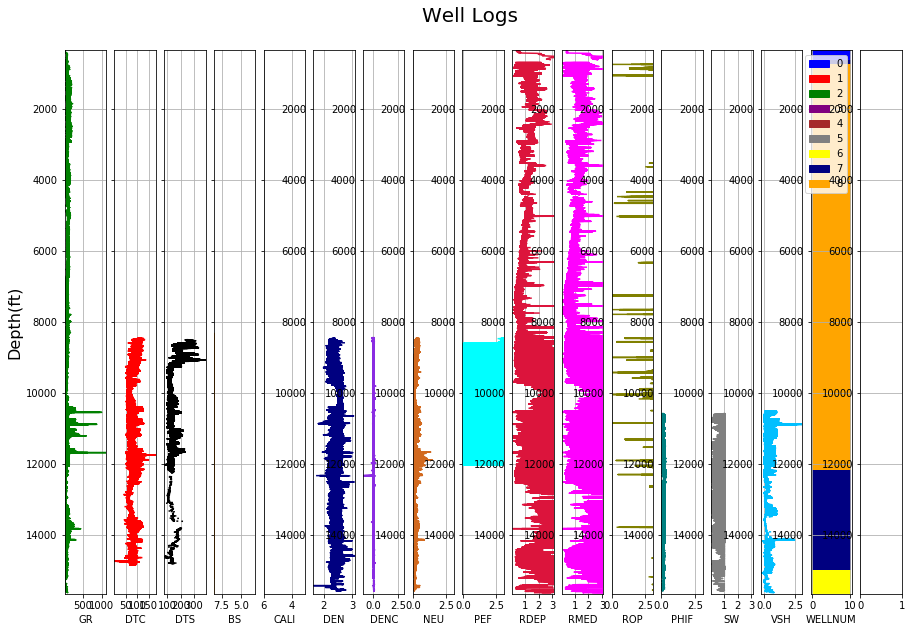

In [10]:
log_plot(train)

In [11]:
train.isna().sum()/len(train)

WELLNUM   0.00
DEPTH     0.00
DTC       0.78
DTS       0.86
BS        0.10
CALI      0.70
DEN       0.70
DENC      0.72
GR        0.01
NEU       0.70
PEF       0.72
RDEP      0.10
RMED      0.09
ROP       0.10
PHIF      0.85
SW        0.85
VSH       0.86
dtype: float64

In [12]:
len(train[train.PHIF.isna() & train.SW.isna() & train.VSH.isna()])/len(train)

0.8429147842880298

In [13]:
train['all_null'] = (train.PHIF.isna() & train.SW.isna() & train.VSH.isna())

In [14]:
train.head()

,WELLNUM,DEPTH,DTC,DTS,BS,CALI,DEN,DENC,GR,NEU,PEF,RDEP,RMED,ROP,PHIF,SW,VSH,all_null
0,0,335.16,nan,nan,nan,nan,nan,nan,5.33,nan,nan,nan,nan,nan,nan,nan,nan,True
1,0,335.66,nan,nan,nan,nan,nan,nan,5.82,nan,nan,nan,nan,nan,nan,nan,nan,True
2,0,336.16,nan,nan,nan,nan,nan,nan,6.52,nan,nan,nan,nan,nan,nan,nan,nan,True
3,0,336.66,nan,nan,nan,nan,nan,nan,7.23,nan,nan,nan,nan,nan,nan,nan,nan,True
4,0,337.16,nan,nan,nan,nan,nan,nan,9.50,nan,nan,nan,nan,nan,nan,nan,nan,True


In [15]:
train_clean = train[train.all_null == False].drop('all_null', axis = 1).reset_index(drop = True)

In [16]:
train_clean.head()

,WELLNUM,DEPTH,DTC,DTS,BS,CALI,DEN,DENC,GR,NEU,PEF,RDEP,RMED,ROP,PHIF,SW,VSH
0,0,11709.16,132.24,nan,nan,12.99,2.29,nan,62.74,0.42,nan,1.18,0.78,nan,0.18,1.00,nan
1,0,11709.66,123.92,nan,nan,12.63,2.30,nan,53.84,0.74,nan,0.88,1.08,nan,0.18,1.00,nan
2,0,11710.16,115.06,nan,nan,12.77,2.28,nan,52.85,0.46,nan,0.95,0.92,nan,0.17,1.00,nan
3,0,11710.66,121.88,nan,nan,11.77,2.28,nan,58.23,0.50,nan,0.87,1.24,nan,0.16,1.00,nan
4,0,11711.16,125.35,nan,nan,11.62,2.33,nan,57.34,0.60,nan,0.83,0.96,nan,0.15,1.00,nan


In [17]:
train_clean.isna().sum()/len(train_clean)

WELLNUM   0.00
DEPTH     0.00
DTC       0.48
DTS       0.84
BS        0.14
CALI      0.02
DEN       0.02
DENC      0.16
GR        0.00
NEU       0.02
PEF       0.16
RDEP      0.01
RMED      0.00
ROP       0.14
PHIF      0.06
SW        0.06
VSH       0.10
dtype: float64

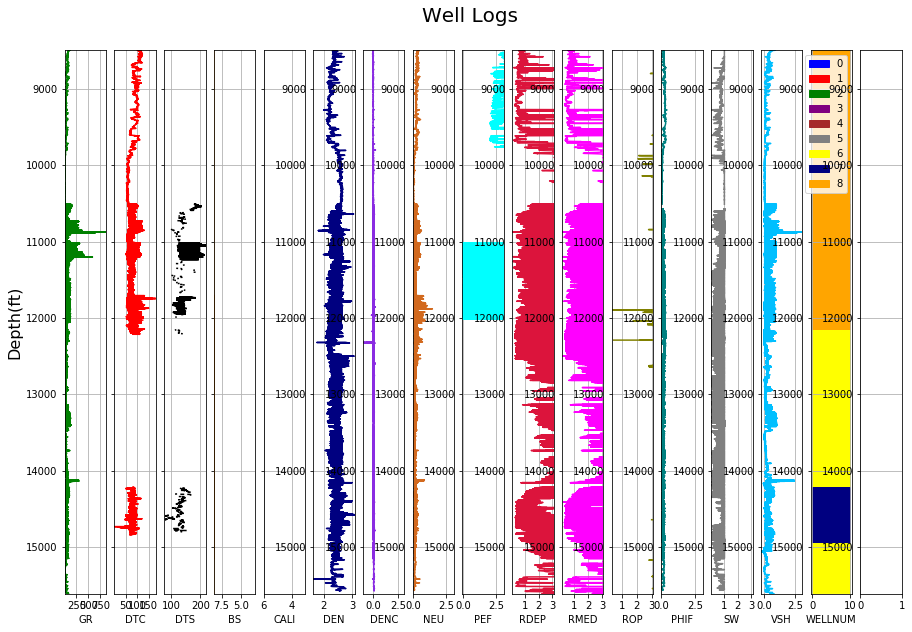

In [19]:
log_plot(train_clean)

df_new = train_clean.copy()
df_new['WELLNUM'] = train_clean['WELLNUM'].astype('str')
sns.pairplot(df_new[['WELLNUM', 'GR', 'DEN', 'NEU', 'RDEP', 'PHIF', 'SW', 'VSH']], hue='WELLNUM');

In [20]:
# GR and NEU seems to be a good predictor for Vsh
# DEN seems to be a good predictor for PHIF

In [18]:
len(train_clean)

50105

In [19]:
train_clean.describe()

,WELLNUM,DEPTH,DTC,DTS,BS,CALI,DEN,DENC,GR,NEU,PEF,RDEP,RMED,ROP,PHIF,SW,VSH
count,50105.00,50105.00,25885.00,8229.00,43220.00,49058.00,49104.00,42219.00,50105.00,48911.00,42219.00,49772.00,50006.00,43123.00,47314.00,47314.00,45100.00
mean,4.37,12297.65,78.91,137.97,8.50,8.76,2.41,0.05,45.58,0.19,5.14,22.01,873.03,23.38,0.14,0.70,0.31
std,2.62,1551.76,15.53,24.13,0.00,0.52,0.16,0.03,45.77,0.09,1.84,406.24,7189.75,7.82,0.09,0.35,0.25
min,0.00,8494.00,1.03,74.82,8.50,6.00,1.63,-0.98,2.77,-0.00,-0.02,0.07,0.09,0.34,0.00,0.01,-0.25
25%,2.00,11229.00,68.37,124.53,8.50,8.57,2.26,0.03,19.89,0.14,4.55,1.44,1.48,18.84,0.06,0.34,0.12
50%,5.00,12009.84,75.38,133.53,8.50,8.62,2.43,0.05,36.01,0.18,5.42,2.67,3.07,24.95,0.13,0.93,0.25
75%,6.00,13394.36,86.88,141.52,8.50,8.70,2.55,0.06,54.15,0.22,6.13,7.36,8.72,29.91,0.22,1.00,0.39
max,8.00,15614.17,181.81,217.97,8.50,20.33,3.09,0.26,873.77,1.46,13.36,80266.80,62290.80,77.63,0.40,1.00,3.65


values between 13000 and 14500 are missing

df_new = train_clean.copy()
df_new['WELLNUM'] = train_clean['WELLNUM'].astype('str')
sns.pairplot(df_new[['DEPTH','WELLNUM', 'GR', 'DEN', 'NEU', 'RDEP', 'PHIF', 'SW', 'VSH']], hue='WELLNUM');

To remove:

depth
bit size
CAL
well number
*Corrected Density (leave till later)

WORKFLOW
- Remove irrelevant variables (majorly based on domain knowledge)

-Remove missing values

-Remove outliers (with specific outlier removal techniques and good reasons) 

-Check integrity of data after outlier removal (Ensure that there are no missing values and both predicting and target variables are available with values) 

-Check for collinearity and select appropriate predicting variables alongside other good reasons besides collinearity. 

-Please Ensure to have good plots in all steps and appropriate comments where applicable

In [20]:
train_clean.columns

Index(['WELLNUM', 'DEPTH', 'DTC', 'DTS', 'BS', 'CALI', 'DEN', 'DENC', 'GR',
       'NEU', 'PEF', 'RDEP', 'RMED', 'ROP', 'PHIF', 'SW', 'VSH'],
      dtype='object')

In [21]:
Train_clean = train_clean.drop(['WELLNUM', 'DEPTH','BS','DENC'], axis = 1)
 # 'BS','DENC' dropped for low variance
print(len(Train_clean))
Train_clean.head()

50105


,DTC,DTS,CALI,DEN,GR,NEU,PEF,RDEP,RMED,ROP,PHIF,SW,VSH
0,132.24,nan,12.99,2.29,62.74,0.42,nan,1.18,0.78,nan,0.18,1.00,nan
1,123.92,nan,12.63,2.30,53.84,0.74,nan,0.88,1.08,nan,0.18,1.00,nan
2,115.06,nan,12.77,2.28,52.85,0.46,nan,0.95,0.92,nan,0.17,1.00,nan
3,121.88,nan,11.77,2.28,58.23,0.50,nan,0.87,1.24,nan,0.16,1.00,nan
4,125.35,nan,11.62,2.33,57.34,0.60,nan,0.83,0.96,nan,0.15,1.00,nan


In [22]:
Train_clean.describe()

,DTC,DTS,CALI,DEN,GR,NEU,PEF,RDEP,RMED,ROP,PHIF,SW,VSH
count,25885.00,8229.00,49058.00,49104.00,50105.00,48911.00,42219.00,49772.00,50006.00,43123.00,47314.00,47314.00,45100.00
mean,78.91,137.97,8.76,2.41,45.58,0.19,5.14,22.01,873.03,23.38,0.14,0.70,0.31
std,15.53,24.13,0.52,0.16,45.77,0.09,1.84,406.24,7189.75,7.82,0.09,0.35,0.25
min,1.03,74.82,6.00,1.63,2.77,-0.00,-0.02,0.07,0.09,0.34,0.00,0.01,-0.25
25%,68.37,124.53,8.57,2.26,19.89,0.14,4.55,1.44,1.48,18.84,0.06,0.34,0.12
50%,75.38,133.53,8.62,2.43,36.01,0.18,5.42,2.67,3.07,24.95,0.13,0.93,0.25
75%,86.88,141.52,8.70,2.55,54.15,0.22,6.13,7.36,8.72,29.91,0.22,1.00,0.39
max,181.81,217.97,20.33,3.09,873.77,1.46,13.36,80266.80,62290.80,77.63,0.40,1.00,3.65


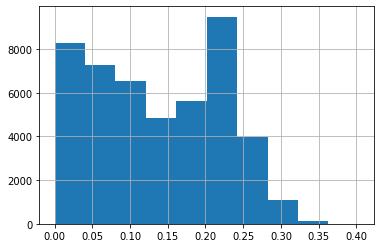

In [23]:
Train_clean.PHIF.hist();

In [24]:
Train_clean.var()

DTC         241.13
DTS         582.36
CALI          0.27
DEN           0.03
GR         2095.32
NEU           0.01
PEF           3.38
RDEP     165033.84
RMED   51692463.01
ROP          61.14
PHIF          0.01
SW            0.12
VSH           0.06
dtype: float64

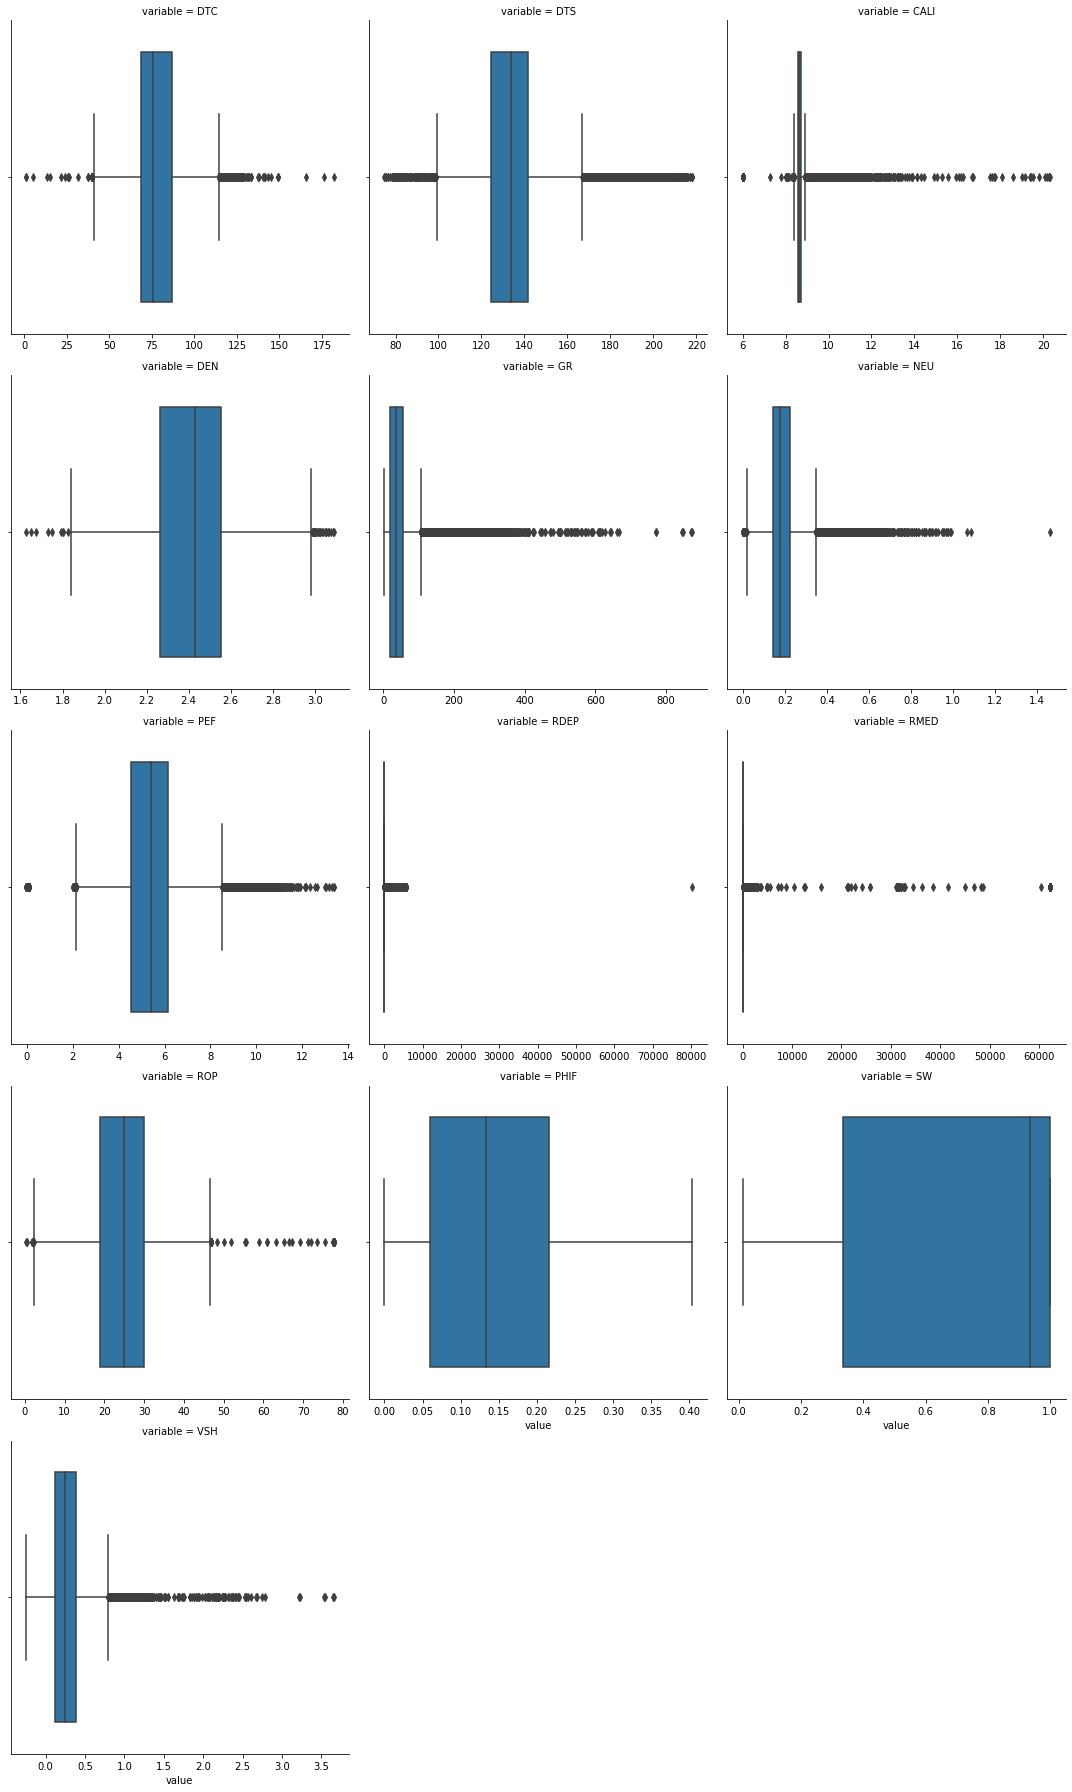

In [29]:
train_melt = Train_clean.melt(var_name='variable', value_name='value')
g = sns.catplot(data = train_melt, x = 'value', col = 'variable', kind = 'box', sharex = False, col_wrap = 3)

In [30]:
Train_clean.columns

Index(['DTC', 'DTS', 'CALI', 'DEN', 'GR', 'NEU', 'PEF', 'RDEP', 'RMED', 'ROP',
       'PHIF', 'SW', 'VSH'],
      dtype='object')

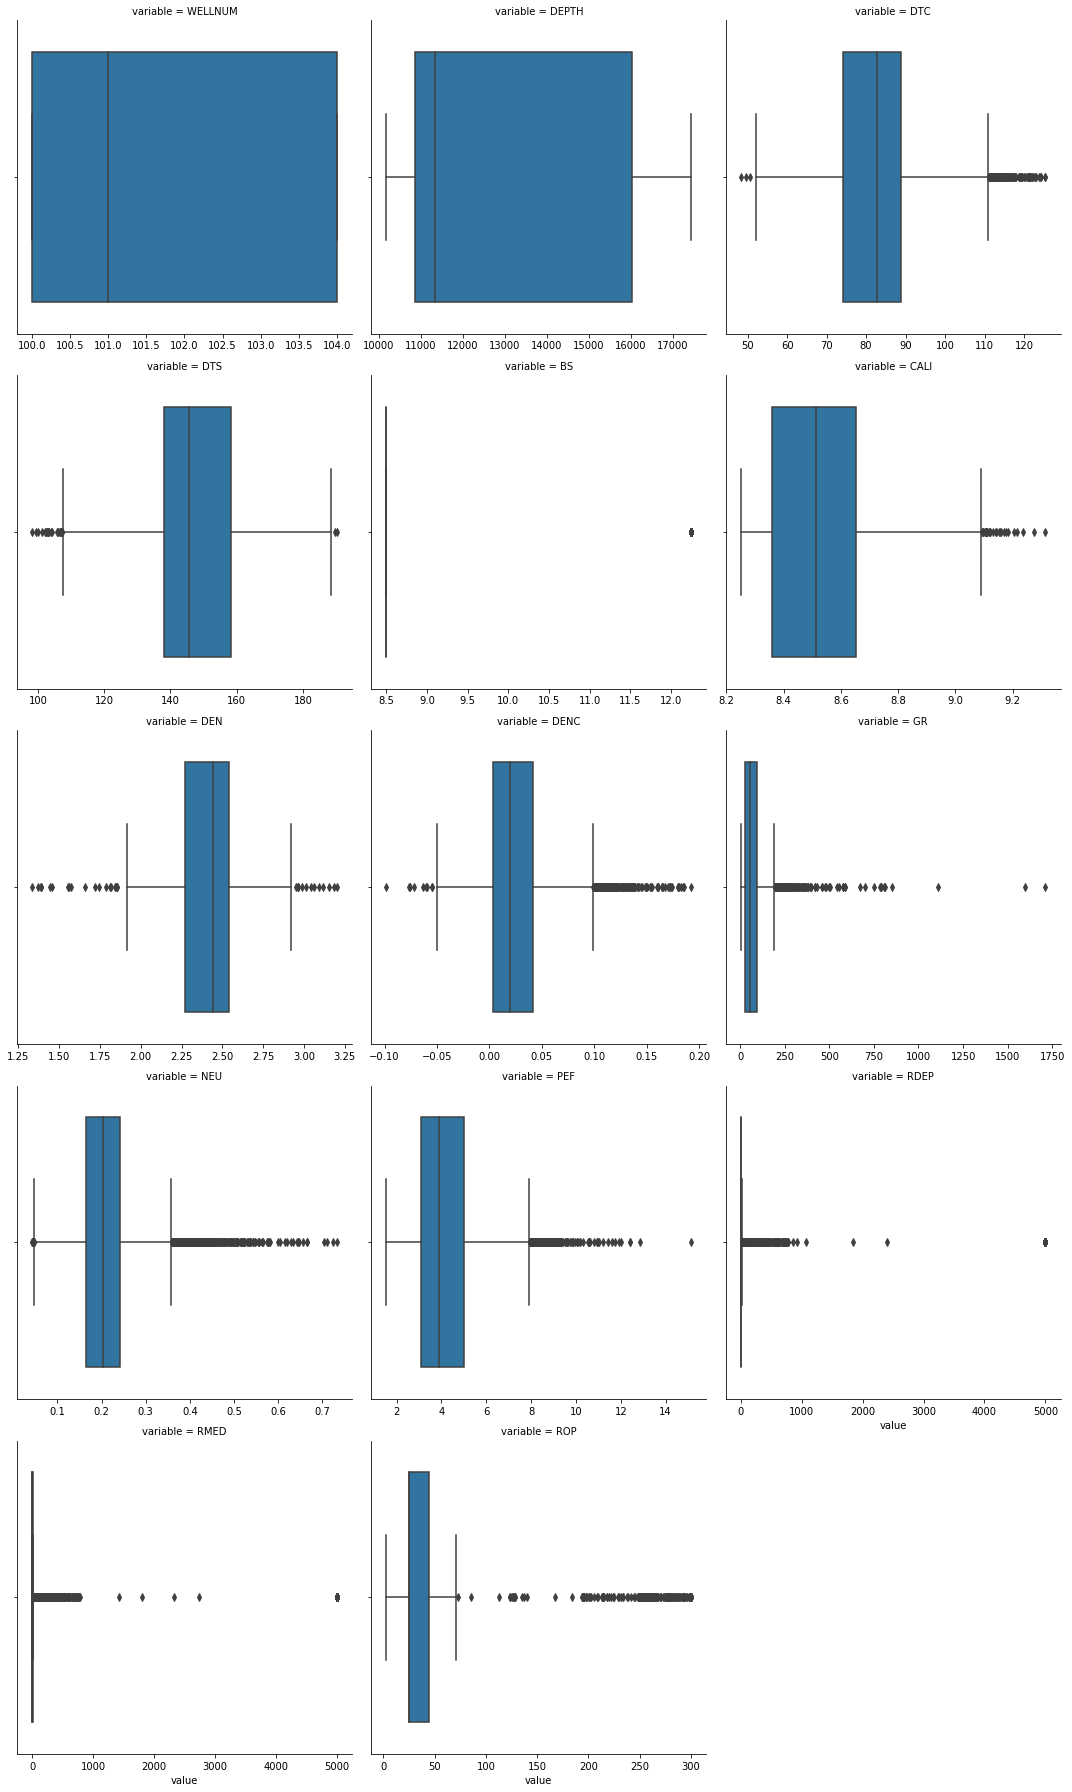

In [36]:
test_melt = test.melt(var_name='variable', value_name='value')
g = sns.catplot(data = test_melt, x = 'value', col = 'variable', kind = 'box', sharex = False, col_wrap = 3)

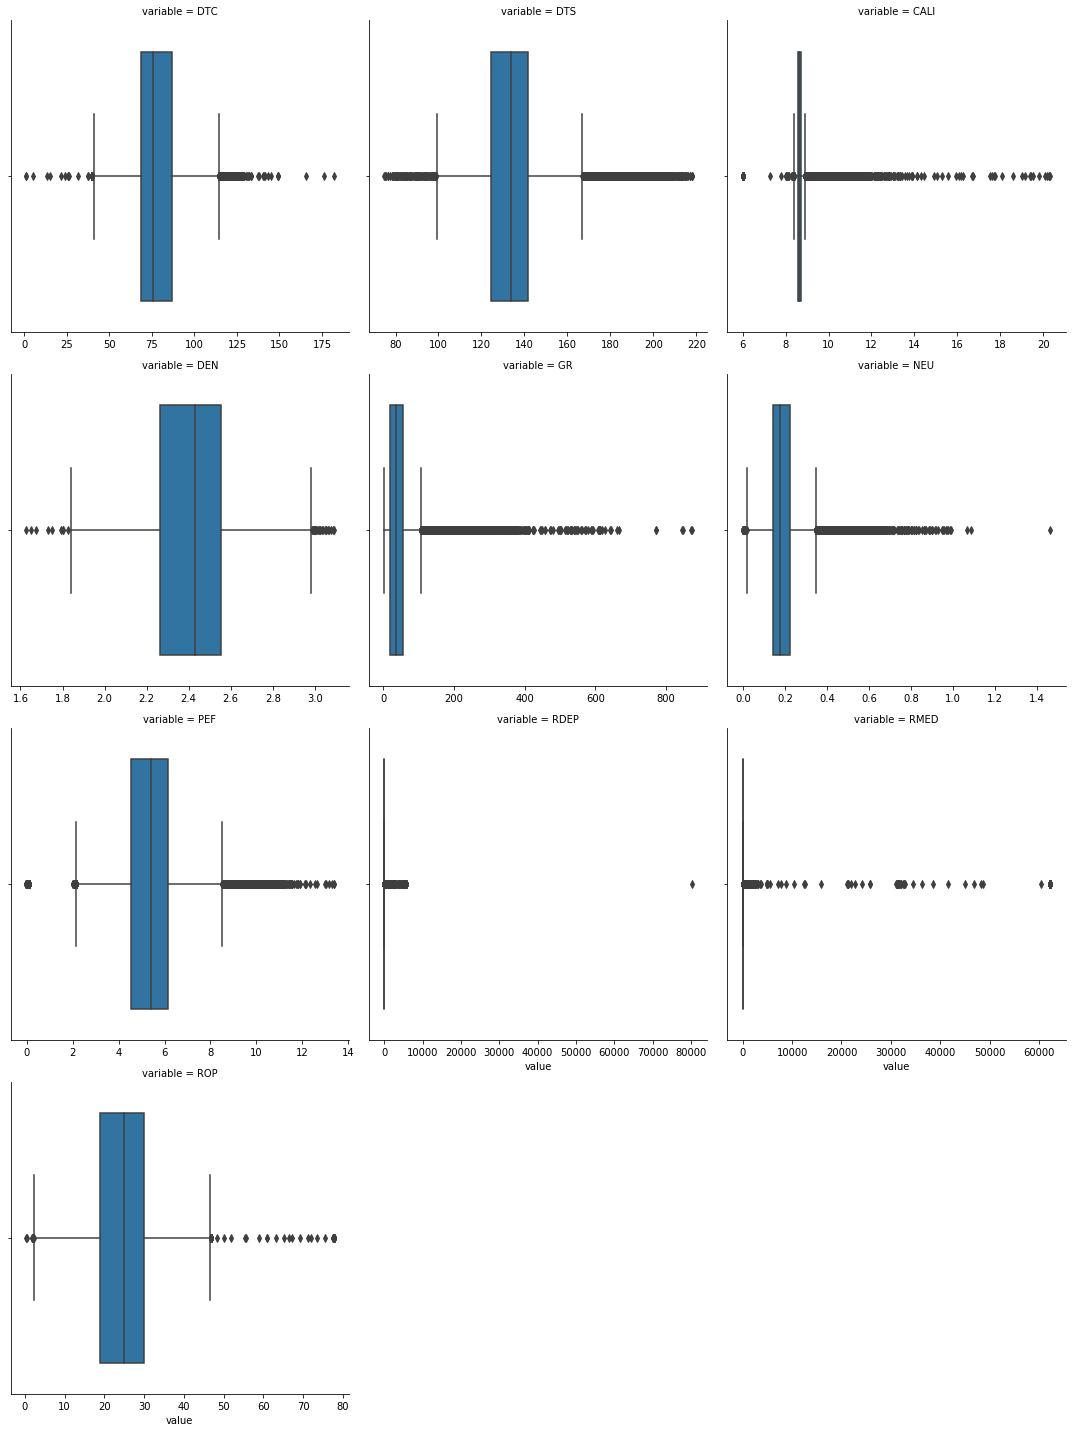

In [37]:
train_melt = Train_clean[['DTC', 'DTS', 'CALI', 'DEN', 'GR', 'NEU', 'PEF', 'RDEP', 'RMED', 'ROP']].melt(var_name='variable', value_name='value')
g = sns.catplot(data = train_melt, x = 'value', col = 'variable', kind = 'box', sharex = False, col_wrap = 3)

In [38]:
test.describe()

,WELLNUM,DEPTH,DTC,DTS,BS,CALI,DEN,DENC,GR,NEU,PEF,RDEP,RMED,ROP
count,11275.00,11275.00,10614.00,3911.00,11275.00,11275.00,11193.00,11193.00,11275.00,11271.00,11193.00,11198.00,11198.00,6394.00
mean,102.01,12643.58,81.92,146.65,8.53,8.53,2.41,0.03,65.90,0.21,4.14,32.27,35.85,44.89
std,1.64,2516.27,11.36,15.44,0.31,0.19,0.15,0.03,56.26,0.08,1.43,265.81,301.75,56.58
min,100.00,10177.50,48.28,98.21,8.50,8.25,1.33,-0.10,3.99,0.04,1.55,0.10,0.10,3.02
25%,100.00,10869.50,74.20,138.00,8.50,8.36,2.27,0.00,30.11,0.16,3.08,1.74,1.70,24.82
50%,101.00,11343.00,82.69,145.53,8.50,8.51,2.45,0.02,53.77,0.20,3.90,2.86,2.76,25.05
75%,104.00,16034.25,88.91,158.38,8.50,8.65,2.54,0.04,94.25,0.24,5.02,8.18,7.88,44.09
max,104.00,17443.50,125.39,190.26,12.25,9.31,3.20,0.19,1711.42,0.73,15.14,5000.00,5000.00,300.11


In [39]:
Train_clean.describe()

,DTC,DTS,CALI,DEN,GR,NEU,PEF,RDEP,RMED,ROP,PHIF,SW,VSH
count,25885.00,8229.00,49058.00,49104.00,50105.00,48911.00,42219.00,49772.00,50006.00,43123.00,47314.00,47314.00,45100.00
mean,78.91,137.97,8.76,2.41,45.58,0.19,5.14,22.01,873.03,23.38,0.14,0.70,0.31
std,15.53,24.13,0.52,0.16,45.77,0.09,1.84,406.24,7189.75,7.82,0.09,0.35,0.25
min,1.03,74.82,6.00,1.63,2.77,-0.00,-0.02,0.07,0.09,0.34,0.00,0.01,-0.25
25%,68.37,124.53,8.57,2.26,19.89,0.14,4.55,1.44,1.48,18.84,0.06,0.34,0.12
50%,75.38,133.53,8.62,2.43,36.01,0.18,5.42,2.67,3.07,24.95,0.13,0.93,0.25
75%,86.88,141.52,8.70,2.55,54.15,0.22,6.13,7.36,8.72,29.91,0.22,1.00,0.39
max,181.81,217.97,20.33,3.09,873.77,1.46,13.36,80266.80,62290.80,77.63,0.40,1.00,3.65


In [40]:
len(Train_clean)

50105

In [44]:
condition = ((Train_clean.NEU <= 1.1) & (Train_clean.RDEP <= 10000))
print('applying the condition will leave us with {} rows of data'.format(sum(condition)))

applying the condition will leave us with 48675 rows of data


In [81]:
Train_data = Train_clean[condition]
print(len(Train_data))

48675


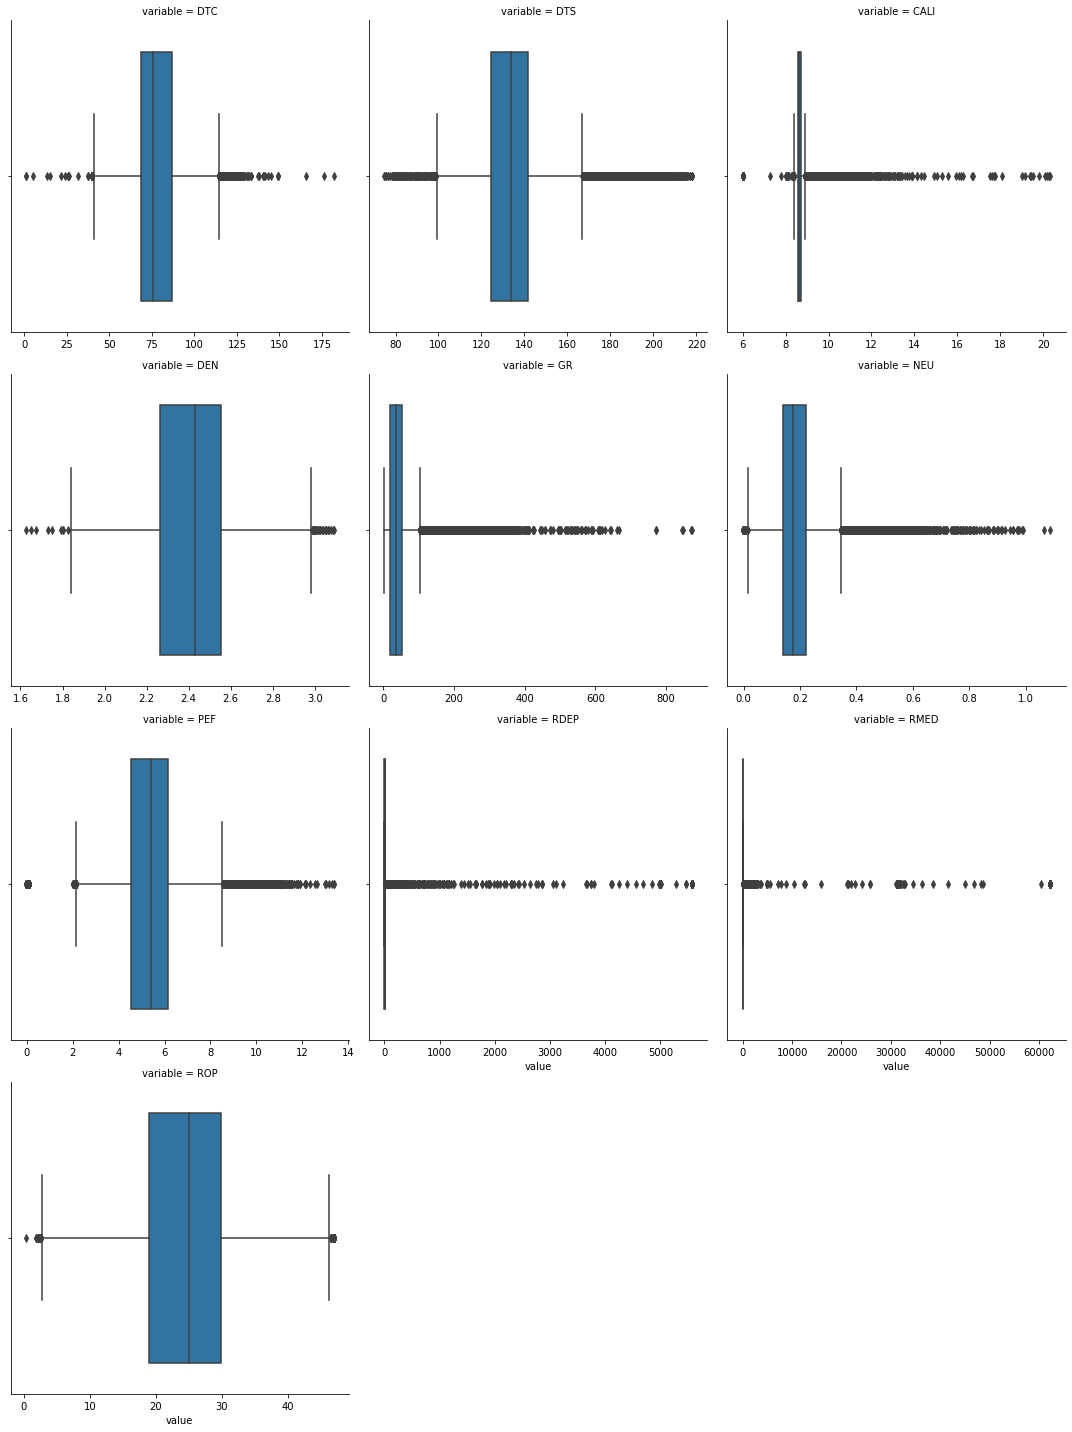

In [47]:
train_melt = Train_data[['DTC', 'DTS', 'CALI', 'DEN', 'GR', 'NEU', 'PEF', 'RDEP', 'RMED', 'ROP']].melt(var_name='variable', value_name='value')
g = sns.catplot(data = train_melt, x = 'value', col = 'variable', kind = 'box', sharex = False, col_wrap = 3)

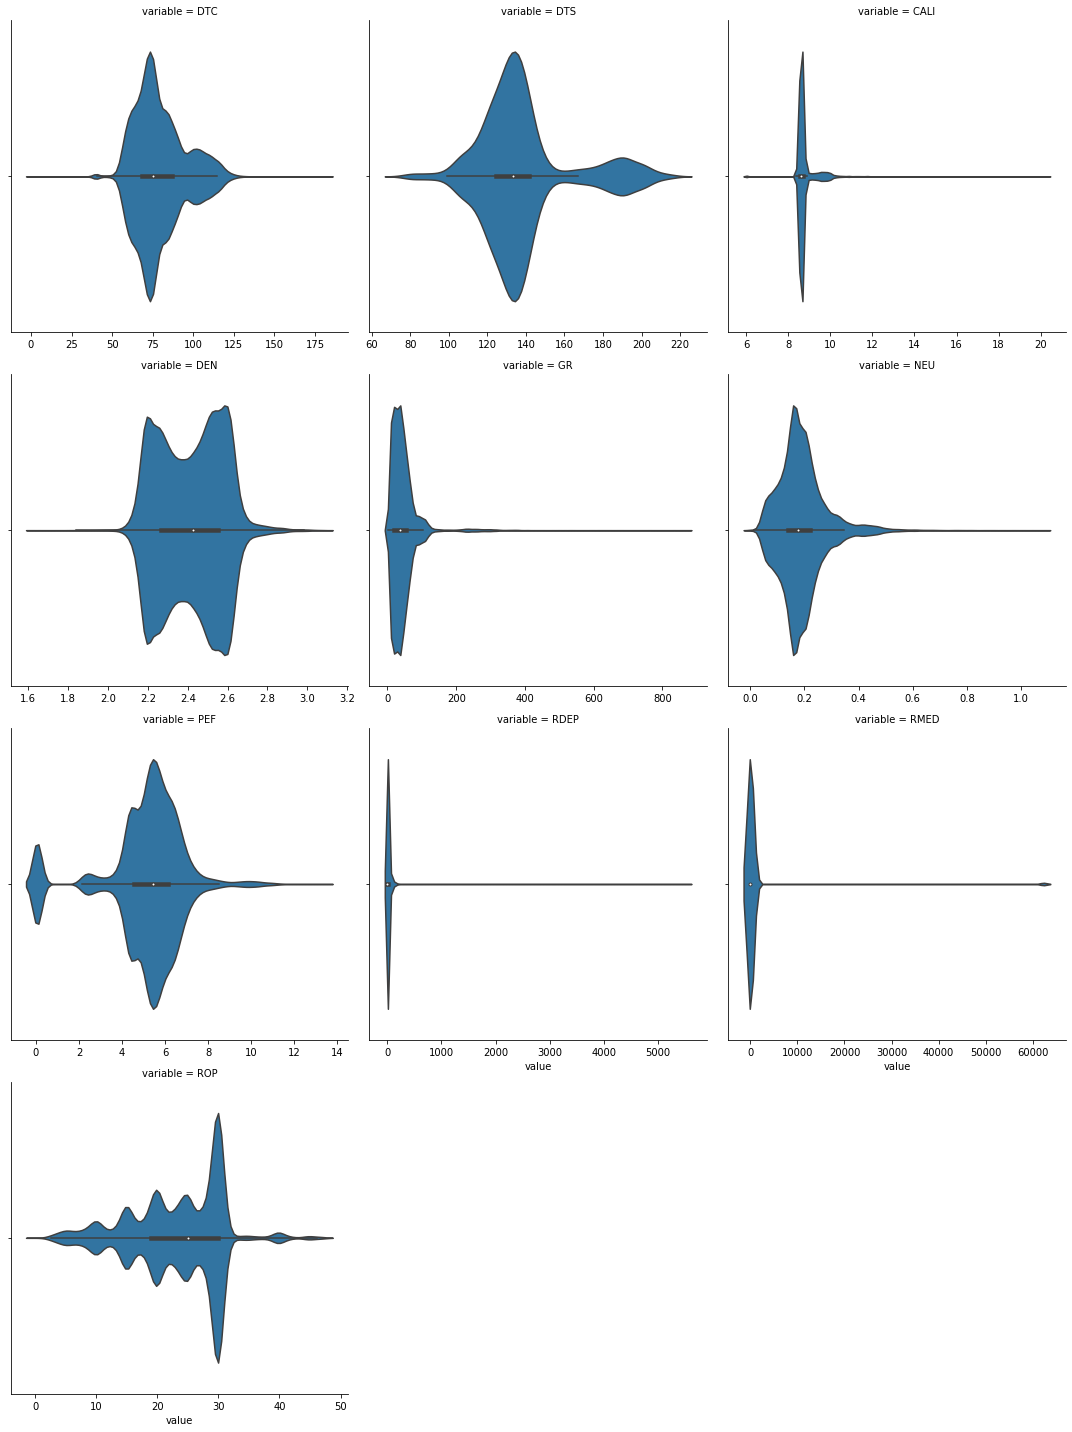

In [48]:
g = sns.catplot(data = train_melt, x = 'value', col = 'variable', kind = 'violin', sharex = False, col_wrap = 3)

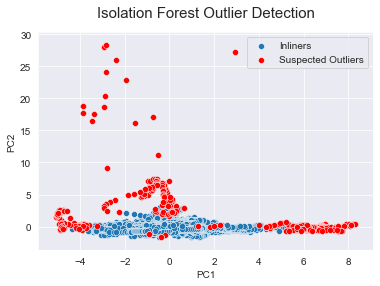

In [52]:
# Use Isolation Forest to detect the prescence of outliers
from sklearn.ensemble import IsolationForest
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
sns.set_style("darkgrid")

XI = Train_data[['DTC', 'DTS', 'CALI', 'DEN', 'GR', 'NEU', 'PEF', 'RDEP', 'RMED', 'ROP']].dropna().values

iforest = IsolationForest(n_estimators=100, max_samples='auto', 
                          contamination=0.05, max_features=1.0, 
                          bootstrap=False, n_jobs=-1, random_state=1)

# Returns 1 of inliers, -1 for outliers
pred = iforest.fit_predict(XI)

# Extract outliers
outlier_index = np.where(pred==-1)
outlier_values = XI[outlier_index]

# Feature scaling 
sc=StandardScaler()
XI_scaled = sc.fit_transform(XI)
outlier_values_scaled = sc.transform(outlier_values)

# Apply PCA to reduce the dimensionality
pca = PCA(n_components=2)
XI_pca = pca.fit_transform(XI_scaled)
outlier_values_pca = pca.transform(outlier_values_scaled)

# Plot the data
sns.scatterplot(x=XI_pca[:,0], y=XI_pca[:,1])
sns.scatterplot(x=outlier_values_pca[:,0], 
                y=outlier_values_pca[:,1], color='r')
plt.title("Isolation Forest Outlier Detection", 
           fontsize=15, pad=15)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(['Inliners','Suspected Outliers'])

In [53]:
len(XI)

8151

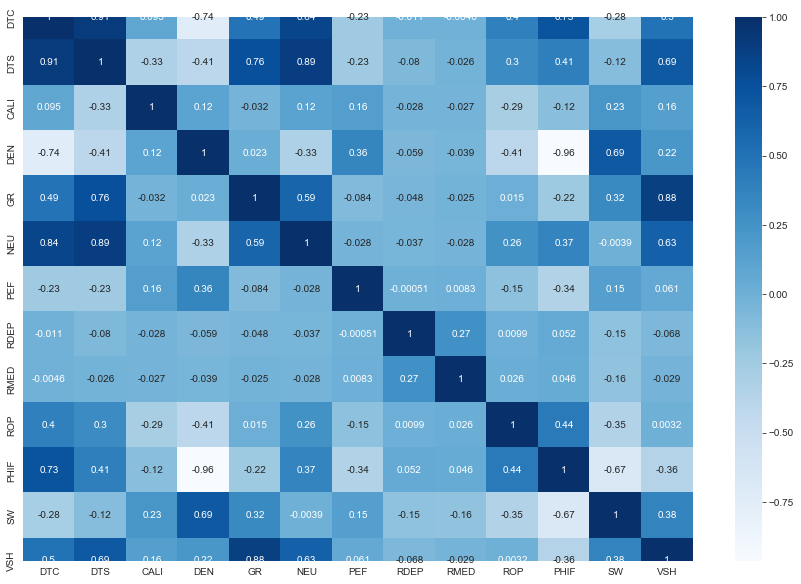

In [54]:
# make a correlation plot (heatmap) to visualize the numerical variables
corr_mx = Train_data.corr()
f, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_mx, annot=True, annot_kws={'size':10}, cmap='Blues')

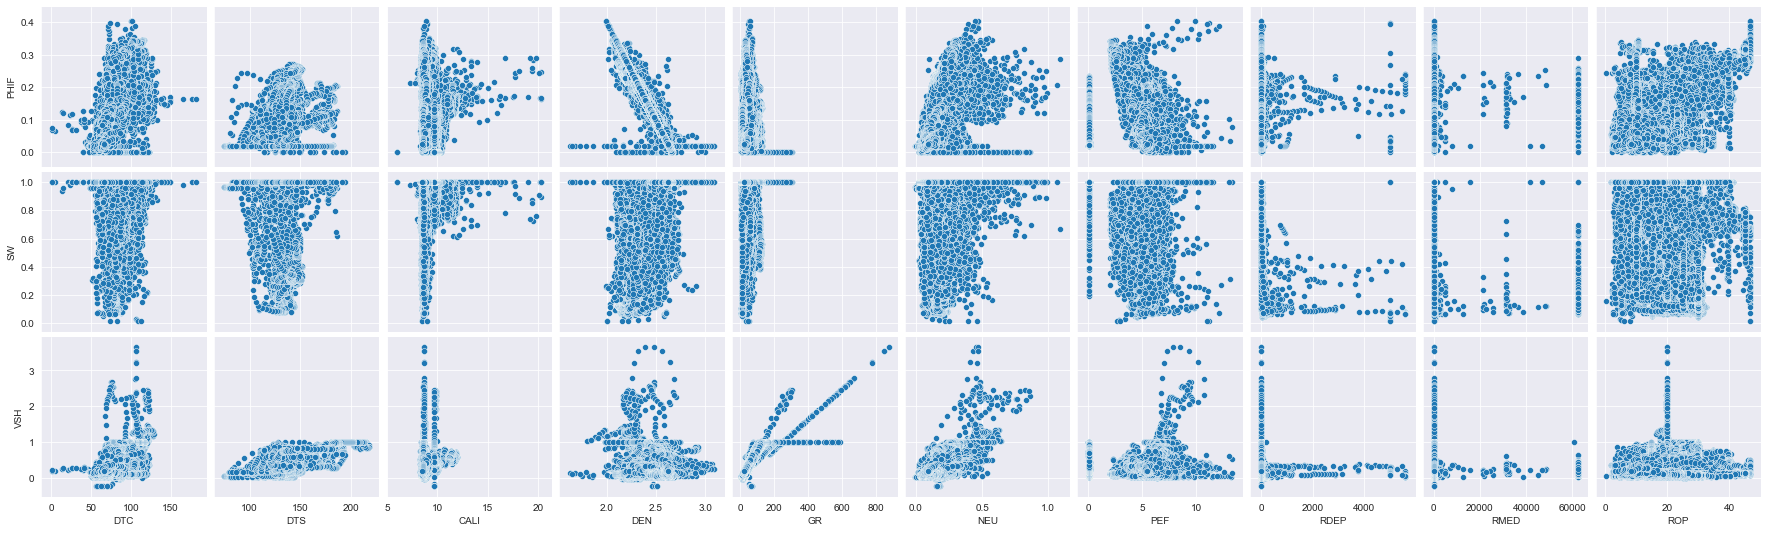

In [75]:
sns.pairplot(Train_data, x_vars = ['DTC', 'DTS', 'CALI', 'DEN', 'GR', 'NEU', 'PEF', 'RDEP', 'RMED', 'ROP'], y_vars = ['PHIF','SW','VSH']);

In [82]:
Train_data.columns

Index(['DTC', 'DTS', 'CALI', 'DEN', 'GR', 'NEU', 'PEF', 'RDEP', 'RMED', 'ROP',
       'PHIF', 'SW', 'VSH'],
      dtype='object')

In [83]:
Train_data.isna().sum()/len(Train_data)

DTC    0.47
DTS    0.83
CALI   0.00
DEN    0.00
GR     0.00
NEU    0.00
PEF    0.14
RDEP   0.00
RMED   0.00
ROP    0.14
PHIF   0.03
SW     0.03
VSH    0.10
dtype: float64

In [84]:
Train_data_copy = Train_data.copy()

In [85]:
Train_data = Train_data[['CALI', 'DEN', 'GR', 'NEU', 'PEF', 'RDEP', 'RMED', 'ROP','PHIF', 'SW', 'VSH']]
print(len(Train_data))

48675


In [87]:
X_col = Train_data.columns[:-3]
y_col = Train_data.columns[-3:]

In [88]:
Train_data.describe()

,CALI,DEN,GR,NEU,PEF,RDEP,RMED,ROP,PHIF,SW,VSH
count,48674.00,48675.00,48675.00,48675.00,41791.00,48675.00,48675.00,41694.00,47075.00,47075.00,43671.00
mean,8.76,2.41,44.87,0.19,5.13,20.82,650.31,23.41,0.14,0.70,0.30
std,0.52,0.16,45.88,0.09,1.84,190.92,6175.63,7.66,0.09,0.35,0.25
min,6.00,1.63,2.77,-0.00,-0.02,0.07,0.09,0.34,0.00,0.01,-0.25
25%,8.57,2.26,19.45,0.14,4.54,1.45,1.49,19.00,0.06,0.34,0.12
50%,8.62,2.43,35.48,0.18,5.42,2.73,3.10,24.96,0.13,0.94,0.24
75%,8.70,2.55,53.25,0.22,6.13,7.61,8.85,29.91,0.22,1.00,0.38
max,20.33,3.09,873.77,1.09,13.36,5571.44,62290.80,46.90,0.40,1.00,3.65


In [102]:
Train_data.dropna(axis = 0, inplace = True)
print(len(Train_data))

40094


In [103]:
Train_data.isna().sum()/len(Train_data)

CALI   0.00
DEN    0.00
GR     0.00
NEU    0.00
PEF    0.00
RDEP   0.00
RMED   0.00
ROP    0.00
PHIF   0.00
SW     0.00
VSH    0.00
dtype: float64

In [253]:
Train_data.head()

,CALI,DEN,GR,NEU,PEF,RDEP,RMED,ROP,PHIF,SW,VSH
7372,8.62,2.63,129.34,0.11,7.39,1.47,1.31,19.80,0.02,1.00,0.74
7373,8.62,2.64,94.61,0.11,7.10,1.50,1.48,19.79,0.02,1.00,0.76
7374,8.62,2.64,72.51,0.11,6.78,1.74,1.96,19.81,0.02,1.00,0.55
7375,8.62,2.62,58.23,0.10,6.49,1.93,2.47,19.82,0.02,1.00,0.41
7376,8.60,2.59,52.72,0.11,6.28,1.97,2.56,19.83,0.04,1.00,0.36


In [254]:
def log_them_all(df):
    """
    add log10 of each feature as new columns to the df
    all columns must be numerical and non-zero
    """
    for col in df.columns:
        df['log_{}'.format(col)] = np.log(df[col])
    return df

In [255]:
Train_data = log_them_all(Train_data)

C:\Users\mikeo\Anaconda3\lib\site-packages\pandas\core\series.py:853: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\mikeo\Anaconda3\lib\site-packages\pandas\core\series.py:853: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [257]:
test_copy = test.copy()

In [258]:
test = log_them_all(test)
test.head()

,WELLNUM,DEPTH,DTC,DTS,BS,CALI,DEN,DENC,GR,NEU,...,log_BS,log_CALI,log_DEN,log_DENC,log_GR,log_NEU,log_PEF,log_RDEP,log_RMED,log_ROP
0,100,15912.50,65.46,nan,8.50,8.28,2.55,0.05,9.79,0.13,...,2.14,2.11,0.93,-2.97,2.28,-2.01,1.77,1.06,0.97,5.57
1,100,15913.00,64.57,nan,8.50,8.28,2.52,0.04,11.28,0.11,...,2.14,2.11,0.93,-3.13,2.42,-2.19,1.80,1.06,0.97,5.57
2,100,15913.50,64.44,nan,8.50,8.28,2.51,0.04,9.95,0.11,...,2.14,2.11,0.92,-3.28,2.30,-2.19,1.80,1.11,1.07,5.57
3,100,15914.00,65.03,nan,8.50,8.28,2.58,0.06,8.63,0.11,...,2.14,2.11,0.95,-2.74,2.16,-2.16,1.82,1.12,1.09,5.57
4,100,15914.50,65.13,nan,8.50,8.29,2.55,0.02,7.31,0.12,...,2.14,2.11,0.94,-4.06,1.99,-2.15,1.64,1.12,1.09,5.57


In [256]:
Train_data.head()

,CALI,DEN,GR,NEU,PEF,RDEP,RMED,ROP,PHIF,SW,...,log_DEN,log_GR,log_NEU,log_PEF,log_RDEP,log_RMED,log_ROP,log_PHIF,log_SW,log_VSH
7372,8.62,2.63,129.34,0.11,7.39,1.47,1.31,19.80,0.02,1.00,...,0.97,4.86,-2.21,2.00,0.38,0.27,2.99,-3.91,0.00,-0.29
7373,8.62,2.64,94.61,0.11,7.10,1.50,1.48,19.79,0.02,1.00,...,0.97,4.55,-2.25,1.96,0.41,0.39,2.99,-3.91,0.00,-0.28
7374,8.62,2.64,72.51,0.11,6.78,1.74,1.96,19.81,0.02,1.00,...,0.97,4.28,-2.25,1.91,0.55,0.67,2.99,-3.91,0.00,-0.60
7375,8.62,2.62,58.23,0.10,6.49,1.93,2.47,19.82,0.02,1.00,...,0.96,4.06,-2.26,1.87,0.66,0.90,2.99,-3.74,0.00,-0.89
7376,8.60,2.59,52.72,0.11,6.28,1.97,2.56,19.83,0.04,1.00,...,0.95,3.96,-2.24,1.84,0.68,0.94,2.99,-3.19,0.00,-1.02


In [259]:
Train_data.columns

Index(['CALI', 'DEN', 'GR', 'NEU', 'PEF', 'RDEP', 'RMED', 'ROP', 'PHIF', 'SW',
       'VSH', 'log_CALI', 'log_DEN', 'log_GR', 'log_NEU', 'log_PEF',
       'log_RDEP', 'log_RMED', 'log_ROP', 'log_PHIF', 'log_SW', 'log_VSH'],
      dtype='object')

In [260]:
X = Train_data[['CALI', 'DEN', 'GR', 'NEU', 'PEF', 'RDEP', 'RMED', 'ROP','log_CALI', 'log_DEN',
                'log_GR', 'log_NEU', 'log_PEF', 'log_RDEP', 'log_RMED', 'log_ROP']]
y = Train_data[['PHIF', 'SW', 'VSH', 'log_PHIF', 'log_SW', 'log_VSH']]

In [263]:
X_col = ['CALI', 'DEN', 'GR', 'NEU', 'PEF', 'RDEP', 'RMED', 'ROP']
y_col = ['PHIF', 'SW', 'VSH']

In [118]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import GridSearchCV

In [114]:
def grid_search(clf, param_grid, X_train=X_train, y_train=y_train):
    """
    Fits a classifier to its training data and prints its ROC AUC score.
    
    INPUT:
    - clf (classifier): classifier to fit
    - param_grid (dict): classifier parameters used with GridSearchCV
    - X_train (DataFrame): training input
    - y_train (DataFrame): training output
            
    OUTPUT:
    - classifier: input classifier fitted to the training data
    """
    # cv uses StratifiedKFold
    # scoring r2 as parameter
    grid = GridSearchCV(estimator=clf, 
                        param_grid=param_grid, 
                        scoring='r2', 
                        cv=5)
    grid.fit(X_train, y_train)
    print(grid.best_score_)
    
    return grid.best_estimator_

In [115]:
def result_plot(y_predict, y_real, n_points=1000):
    names = ['PHIF', 'SW', 'VSH']
    RMSE, R2 = [], []
    
    for i,name in enumerate(names):
        RMSE.append(np.sqrt(mean_squared_error(y_real[i], y_predict[i])))
        R2.append(r2_score(y_real[i], y_predict[i]))
    
    # check the accuracy of predicted data and plot the result
    print('RMSE:', '{:.5f}'.format(np.sqrt(mean_squared_error(y_real, y_predict))))
    for i,name in enumerate(names):
        print(f'    {name:5s} : {RMSE[i]:.5f}')
#     print("-"*65)
    
    print( 'R^2: ', r2_score(y_real, y_predict))
    for i,name in enumerate(names):
        print(f'    {name:5s} : {R2[i]:.5f}')
    
    plt.subplots(nrows=3, ncols=2, figsize=(16,16))

    for i,name in enumerate(names):       
        plt.subplot(3, 2, i*2+1)
        plt.plot(y_real[:n_points, i])
        plt.plot(y_predict[:n_points, i])
        plt.legend(['True', 'Predicted'])
        plt.xlabel('Sample')
        plt.ylabel(name)
        plt.title(name+' Prediction Comparison')

        plt.subplot(3, 2, i*2+2)
        plt.scatter(y_real[:, i], y_predict[:, i], alpha=0.01)
        plt.xlabel('Real Value')
        plt.ylabel('Predicted Value')
        plt.title(name+' Prediction Comparison')
    
    plt.show()

In [212]:
def scores(y_pred, y_real):
    """
    takes predicted and real values and prints the R2 and RMSE values
    Arguments
    ______
    y_pred,y_real: numpy array or pd.series
    
    returns: None
    """
    r2 = r2_score(y_real, y_pred)
    rmse = np.sqrt(mean_squared_error(y_real, y_pred))
    print('R2 is {:.5f} \n RMSE is {:.5f}'.format(r2,rmse))

In [261]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0)


In [262]:
X_train.head()

,CALI,DEN,GR,NEU,PEF,RDEP,RMED,ROP,log_CALI,log_DEN,log_GR,log_NEU,log_PEF,log_RDEP,log_RMED,log_ROP
27436,8.67,2.54,49.82,0.23,6.80,1.81,2.01,29.98,2.16,0.93,3.91,-1.48,1.92,0.59,0.70,3.40
11742,8.70,2.59,42.29,0.11,0.07,1.99,3.03,24.62,2.16,0.95,3.74,-2.25,-2.63,0.69,1.11,3.20
33483,8.67,2.50,48.16,0.24,5.89,7.82,5.63,30.02,2.16,0.92,3.87,-1.45,1.77,2.06,1.73,3.40
21713,8.52,2.26,32.88,0.18,4.80,7.06,7.38,29.87,2.14,0.81,3.49,-1.70,1.57,1.95,2.00,3.40
41984,8.67,2.31,29.25,0.16,5.27,0.47,0.46,14.94,2.16,0.84,3.38,-1.83,1.66,-0.75,-0.77,2.70


In [175]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [268]:
lm = LinearRegression(normalize = True)
lm.fit(X_train[X_col],y_train[y_col])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [270]:
y_pred = lm.predict(X_train[X_col])
result_plot(y_pred, y_train[y_col].to_numpy(), n_points=1000)

RMSE: 0.12432
    PHIF  : 0.09554
    SW    : 0.01597
    VSH   : 0.07201
R^2:  0.8551207904546528
    PHIF  : 0.93855
    SW    : 0.99849
    VSH   : 0.90964


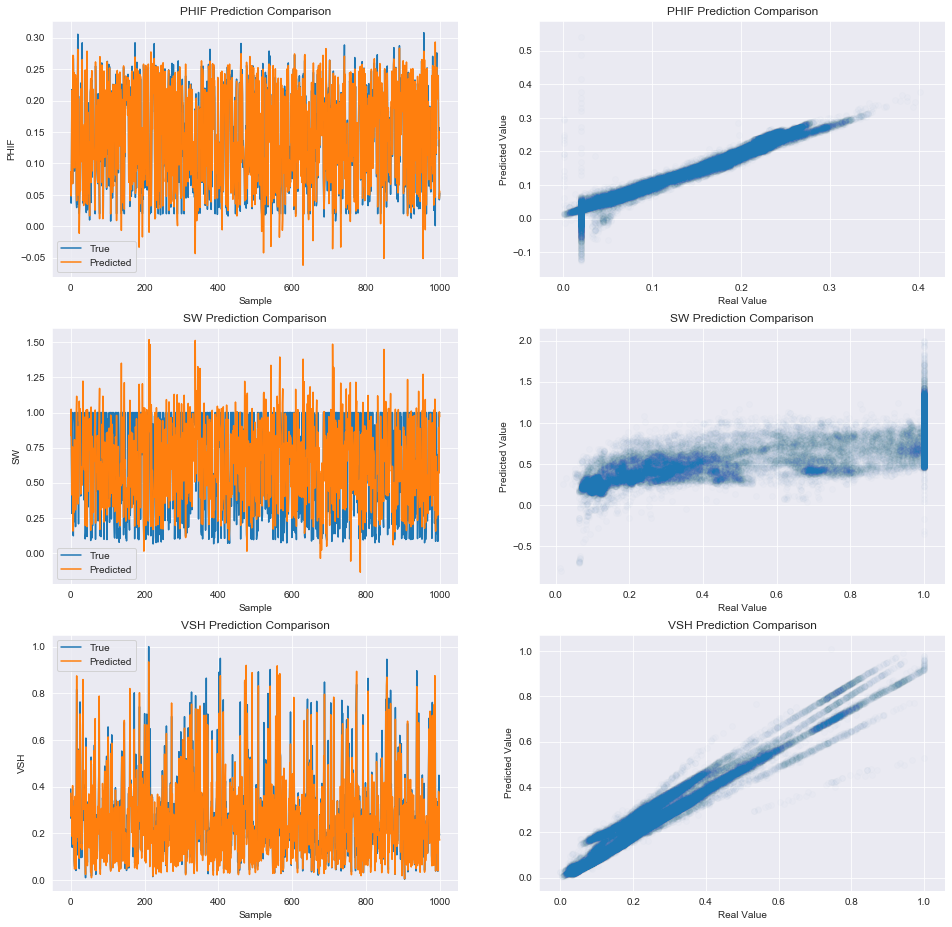

In [273]:
y_val_pred = lm.predict(X_val[X_col])

RMSE: 0.12648
    PHIF  : 0.25113
    SW    : 0.07531
    VSH   : 0.06835
R^2:  0.8473841128488058
    PHIF  : -40.82089
    SW    : 0.95441
    VSH   : -0.13929


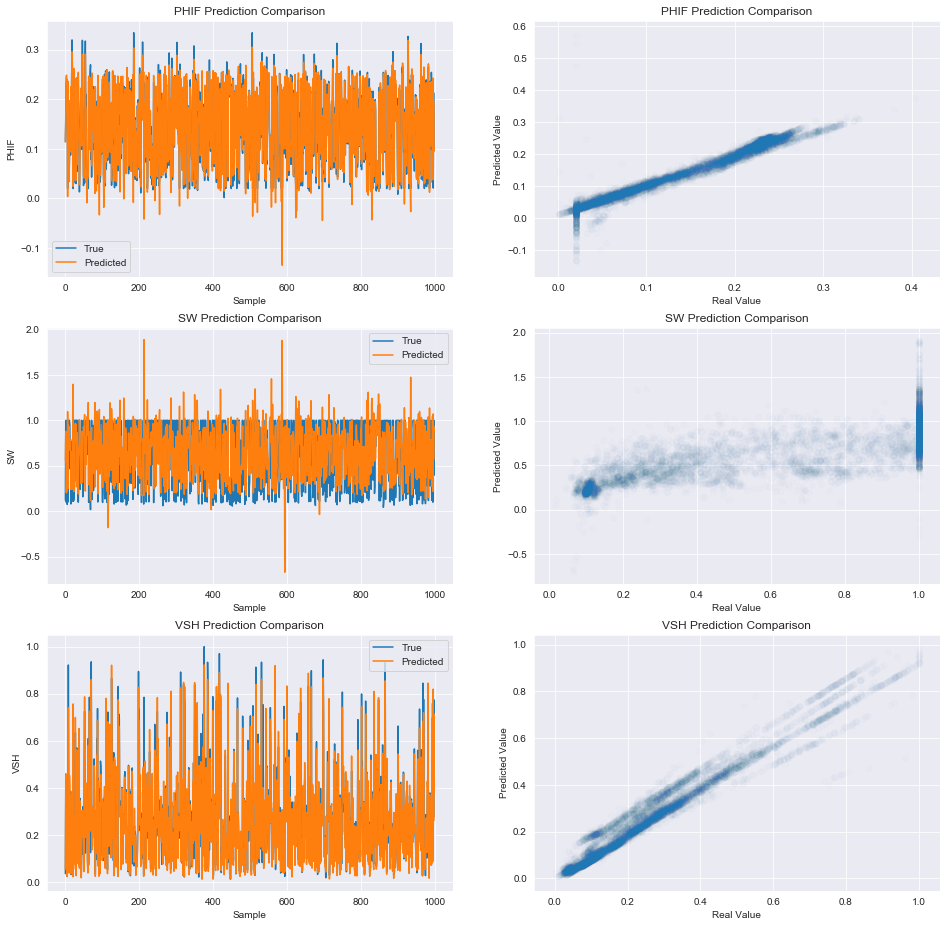

In [274]:
result_plot(y_val_pred, y_val[y_col].to_numpy(), n_points=1000)

### Statsmodels

In [177]:
y_train.head()

,PHIF,SW,VSH
27436,0.07,1.00,0.39
11742,0.04,1.00,0.26
33483,0.09,0.67,0.35
21713,0.22,0.28,0.23
41984,0.19,0.93,0.14


In [275]:
whole_train = X_train.copy()
for col in y_train.columns:
    whole_train[col] = y_train[col]
whole_train.head()

,CALI,DEN,GR,NEU,PEF,RDEP,RMED,ROP,log_CALI,log_DEN,...,log_PEF,log_RDEP,log_RMED,log_ROP,PHIF,SW,VSH,log_PHIF,log_SW,log_VSH
27436,8.67,2.54,49.82,0.23,6.80,1.81,2.01,29.98,2.16,0.93,...,1.92,0.59,0.70,3.40,0.07,1.00,0.39,-2.65,0.00,-0.94
11742,8.70,2.59,42.29,0.11,0.07,1.99,3.03,24.62,2.16,0.95,...,-2.63,0.69,1.11,3.20,0.04,1.00,0.26,-3.30,0.00,-1.33
33483,8.67,2.50,48.16,0.24,5.89,7.82,5.63,30.02,2.16,0.92,...,1.77,2.06,1.73,3.40,0.09,0.67,0.35,-2.44,-0.40,-1.04
21713,8.52,2.26,32.88,0.18,4.80,7.06,7.38,29.87,2.14,0.81,...,1.57,1.95,2.00,3.40,0.22,0.28,0.23,-1.53,-1.27,-1.47
41984,8.67,2.31,29.25,0.16,5.27,0.47,0.46,14.94,2.16,0.84,...,1.66,-0.75,-0.77,2.70,0.19,0.93,0.14,-1.65,-0.08,-1.97


In [276]:
train_col = ['CALI', 'DEN', 'GR', 'NEU', 'PEF', 'ROP', 'RDEP', 'RMED', 'PHIF', 'SW','VSH']

In [277]:
def train_test(target,feature_combination):
    """
    INPUT:
    -target(str): the target variable
    -feature_combination (str): combination of the features 
    """
    
    results = smf.ols('{} ~ {}'.format(target, feature_combination),
                      data = whole_train).fit()
    print(results.summary())

    # test data
    y_preds = results.predict(X_val)
    print('\n\n The following are the metrics on the test data')
    scores(y_preds, y_val[target])
    

In [282]:
train_test('PHIF','CALI+DEN+GR+NEU+PEF+ROP+log_RDEP')

                            OLS Regression Results                            
Dep. Variable:                   PHIF   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                 1.081e+05
Date:                Sat, 29 Jan 2022   Prob (F-statistic):               0.00
Time:                        14:22:21   Log-Likelihood:                 86051.
No. Observations:               32075   AIC:                        -1.721e+05
Df Residuals:                   32067   BIC:                        -1.720e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3847      0.010    135.213      0.0

In [302]:
target = 'PHIF'
feature_combination = 'CALI+DEN+GR+NEU+PEF+ROP+np.log(RDEP)'

results = smf.ols('{} ~ {}'.format(target, feature_combination),
                      data = whole_train).fit()
print(results.summary())

# test data
y_pred_phi = results.predict(X_val)
print('\n\n The following are the metrics on the test data')
scores(y_pred_phi, y_val['PHIF'])

                            OLS Regression Results                            
Dep. Variable:                   PHIF   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                 1.081e+05
Date:                Sat, 29 Jan 2022   Prob (F-statistic):               0.00
Time:                        17:39:13   Log-Likelihood:                 86051.
No. Observations:               32075   AIC:                        -1.721e+05
Df Residuals:                   32067   BIC:                        -1.720e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        1.3847      0.010    135.213   

In [303]:
target = 'np.log(SW)'
feature_combination = 'CALI+DEN+GR+NEU+PEF+ROP+np.log(RDEP)'

results = smf.ols('{} ~ {}'.format(target, feature_combination),
                      data = whole_train).fit()
print(results.summary())

   # test data
y_pred_sw = np.exp(results.predict(X_val))
print('\n\n The following are the metrics on the test data')
scores(y_pred_sw, y_val['SW'])

                            OLS Regression Results                            
Dep. Variable:             np.log(SW)   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                 5.416e+04
Date:                Sat, 29 Jan 2022   Prob (F-statistic):               0.00
Time:                        17:39:45   Log-Likelihood:                 2152.5
No. Observations:               32075   AIC:                            -4289.
Df Residuals:                   32067   BIC:                            -4222.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -1.4431      0.140    -10.303   

In [304]:
target = 'np.log(VSH+1)'
feature_combination = 'CALI+DEN+GR+NEU+PEF+ROP+np.log(RDEP)'

results = smf.ols('{} ~ {}'.format(target, feature_combination),
                      data = whole_train).fit()
print(results.summary())

   # test data
y_pred_vsh = np.exp(results.predict(X_val))-1
print('\n\n The following are the metrics on the test data')
scores(y_pred_vsh, y_val['VSH'])

                            OLS Regression Results                            
Dep. Variable:        np.log(VSH + 1)   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                 1.085e+05
Date:                Sat, 29 Jan 2022   Prob (F-statistic):               0.00
Time:                        17:39:45   Log-Likelihood:                 67534.
No. Observations:               32075   AIC:                        -1.351e+05
Df Residuals:                   32067   BIC:                        -1.350e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.2354      0.018    -12.902   

In [305]:
whole_train.head()

,CALI,DEN,GR,NEU,PEF,RDEP,RMED,ROP,log_CALI,log_DEN,...,log_PEF,log_RDEP,log_RMED,log_ROP,PHIF,SW,VSH,log_PHIF,log_SW,log_VSH
27436,8.67,2.54,49.82,0.23,6.80,1.81,2.01,29.98,2.16,0.93,...,1.92,0.59,0.70,3.40,0.07,1.00,0.39,-2.65,0.00,-0.94
11742,8.70,2.59,42.29,0.11,0.07,1.99,3.03,24.62,2.16,0.95,...,-2.63,0.69,1.11,3.20,0.04,1.00,0.26,-3.30,0.00,-1.33
33483,8.67,2.50,48.16,0.24,5.89,7.82,5.63,30.02,2.16,0.92,...,1.77,2.06,1.73,3.40,0.09,0.67,0.35,-2.44,-0.40,-1.04
21713,8.52,2.26,32.88,0.18,4.80,7.06,7.38,29.87,2.14,0.81,...,1.57,1.95,2.00,3.40,0.22,0.28,0.23,-1.53,-1.27,-1.47
41984,8.67,2.31,29.25,0.16,5.27,0.47,0.46,14.94,2.16,0.84,...,1.66,-0.75,-0.77,2.70,0.19,0.93,0.14,-1.65,-0.08,-1.97


In [306]:
y_pred_valss = pd.DataFrame({'PHIF':y_pred_phi,'SW':y_pred_sw,'VSH':y_pred_vsh})
y_pred_valss

,PHIF,SW,VSH
21209,0.11,0.17,0.09
43087,0.17,0.81,0.45
30715,0.24,0.09,0.10
29946,0.24,0.09,0.11
41269,0.20,0.53,0.10
...,...,...,...
24140,0.10,0.87,0.51
29374,0.11,0.62,0.36
21747,0.19,0.31,0.26
37591,0.07,1.04,0.29


In [307]:
y_val[y_col]

,PHIF,SW,VSH
21209,0.11,0.12,0.04
43087,0.16,1.00,0.41
30715,0.23,0.10,0.09
29946,0.24,0.10,0.10
41269,0.20,0.49,0.08
...,...,...,...
24140,0.08,1.00,0.53
29374,0.09,0.73,0.38
21747,0.20,0.28,0.29
37591,0.06,1.00,0.32


In [314]:
def result_plot(y_predict, y_real, n_points=1000):
    names = ['PHIF', 'SW', 'VSH']
    RMSE, R2 = [], []
    
    for i,name in enumerate(names):
        print(i,name)
        RMSE.append(np.sqrt(mean_squared_error(y_real[i], y_predict[i])))
        r2 = r2_score(y_real[i], y_predict[i])
        print(r2)
        R2.append(r2)
    
    # check the accuracy of predicted data and plot the result
    print('RMSE:', '{:.5f}'.format(np.sqrt(mean_squared_error(y_real, y_predict))))
    for i,name in enumerate(names):
        print(f'    {name:5s} : {RMSE[i]:.5f}')
#     print("-"*65)
    
    print( 'R^2: ', r2_score(y_real, y_predict))
    for i,name in enumerate(names):
        print(f'    {name:5s} : {R2[i]:.5f}')
    
    plt.subplots(nrows=3, ncols=2, figsize=(16,16))

    for i,name in enumerate(names):       
        plt.subplot(3, 2, i*2+1)
        plt.plot(y_real[:n_points, i])
        plt.plot(y_predict[:n_points, i])
        plt.legend(['True', 'Predicted'])
        plt.xlabel('Sample')
        plt.ylabel(name)
        plt.title(name+' Prediction Comparison')

        plt.subplot(3, 2, i*2+2)
        plt.scatter(y_real[:, i], y_predict[:, i], alpha=0.01)
        plt.xlabel('Real Value')
        plt.ylabel('Predicted Value')
        plt.title(name+' Prediction Comparison')
    
    plt.show()

In [315]:
r2_score(y_pred_valss.PHIF,y_val.PHIF)

0.9466739547320769

In [313]:
names = ['PHIF', 'SW', 'VSH']
[(i,name) for i,name in enumerate(names)]

[(0, 'PHIF'), (1, 'SW'), (2, 'VSH')]

In [311]:
result_plot??

In [326]:
a = y_val[y_col].to_numpy()
b = y_pred_valss.to_numpy()
r2_score(a[0],b[0])


-0.06486356399312831

In [321]:
y_val[y_col]

,PHIF,SW,VSH
21209,0.11,0.12,0.04
43087,0.16,1.00,0.41
30715,0.23,0.10,0.09
29946,0.24,0.10,0.10
41269,0.20,0.49,0.08
...,...,...,...
24140,0.08,1.00,0.53
29374,0.09,0.73,0.38
21747,0.20,0.28,0.29
37591,0.06,1.00,0.32


In [320]:
y_pred_valss

,PHIF,SW,VSH
21209,0.11,0.17,0.09
43087,0.17,0.81,0.45
30715,0.24,0.09,0.10
29946,0.24,0.09,0.11
41269,0.20,0.53,0.10
...,...,...,...
24140,0.10,0.87,0.51
29374,0.11,0.62,0.36
21747,0.19,0.31,0.26
37591,0.07,1.04,0.29


In [323]:
r2_score(y_pred_valss.PHIF,y_val[y_col].PHIF)

0.9466739547320769

0 PHIF
-0.06486356399312831
1 SW
0.8983993363142769
2 VSH
0.9862656553831284
RMSE: 0.11152
    PHIF  : 0.04007
    SW    : 0.11242
    VSH   : 0.00750
R^2:  0.875943560836436
    PHIF  : -0.06486
    SW    : 0.89840
    VSH   : 0.98627


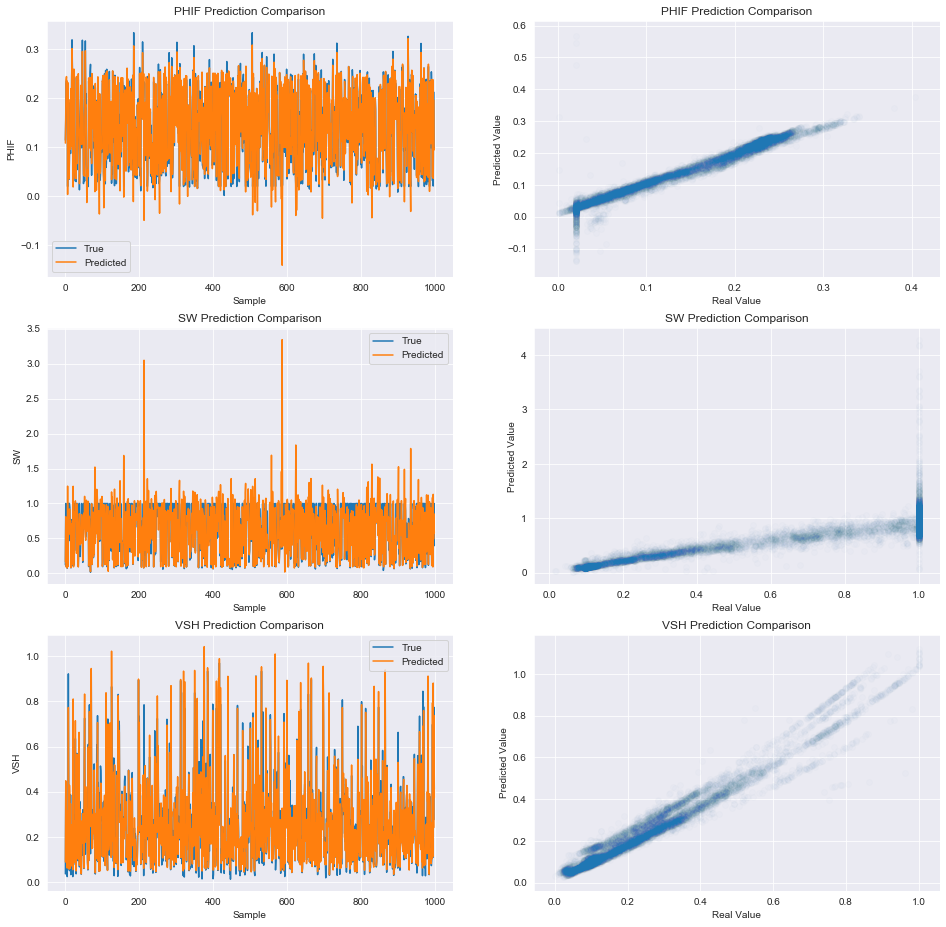

In [316]:
result_plot(y_pred_valss.to_numpy(), y_val[y_col].to_numpy(), n_points=1000)

## Random Forest Regressor

In [328]:
from sklearn.ensemble import RandomForestRegressor

In [329]:
RF_phi = RandomForestRegressor()
RF_phi.fit(X_train[X_col], y_train[y_col])

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [347]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from statistics import mean

In [ ]:
scores = cross_val_score(RF_phi, X_train[X_col], y_train[y_col], cv=10, scoring='r2')
scores.mean()

In [ ]:
scores = cross_val_score(RF_phi, X_train[X_col], y_train[y_col], cv=10, scoring='neg_root_mean_squared_error')
scores.mean()

0 PHIF
0.9999974914677741
1 SW
0.9999664870453372
2 VSH
0.9999837574356918
RMSE: 0.00773
    PHIF  : 0.00061
    SW    : 0.00238
    VSH   : 0.00097
R^2:  0.9989933005657538
    PHIF  : 1.00000
    SW    : 0.99997
    VSH   : 0.99998


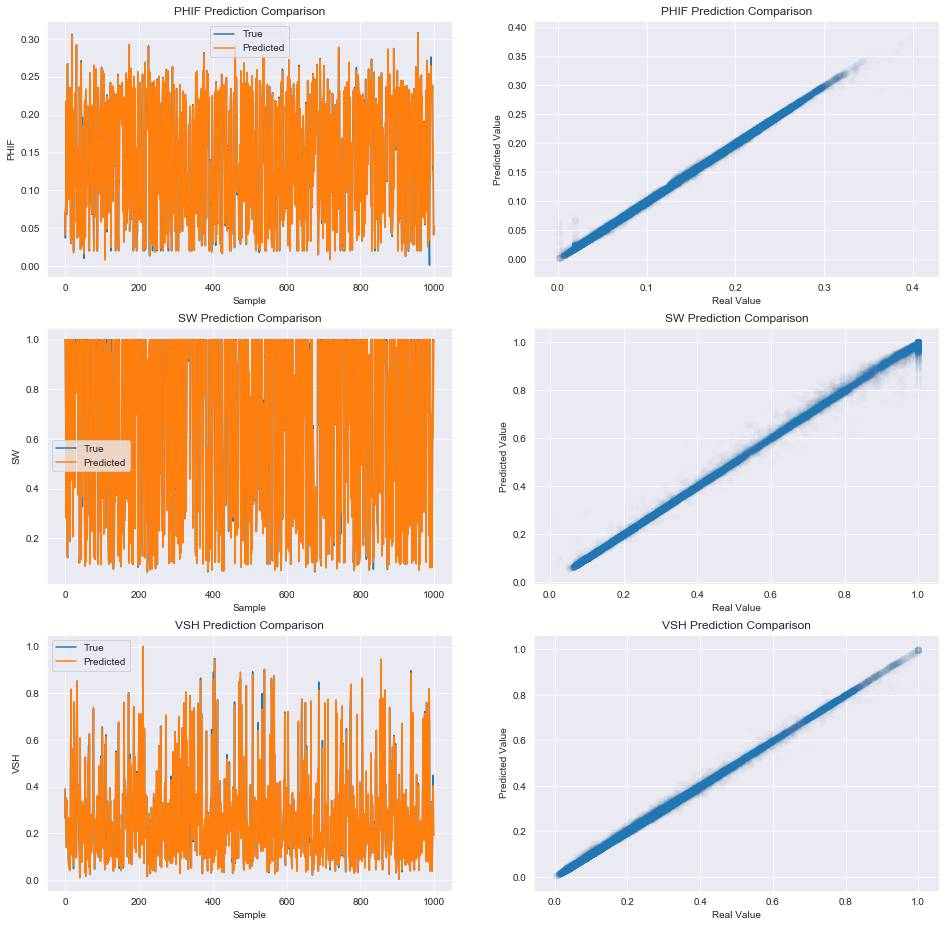

In [330]:
y_pred = RF_phi.predict(X_train[X_col])
result_plot(y_pred, y_train[y_col].to_numpy(), n_points=1000)

0 PHIF
0.9865576538688251
1 SW
0.9999520573859383
2 VSH
0.9997498779899011
RMSE: 0.02175
    PHIF  : 0.00450
    SW    : 0.00244
    VSH   : 0.00101
R^2:  0.9926549654836773
    PHIF  : 0.98656
    SW    : 0.99995
    VSH   : 0.99975


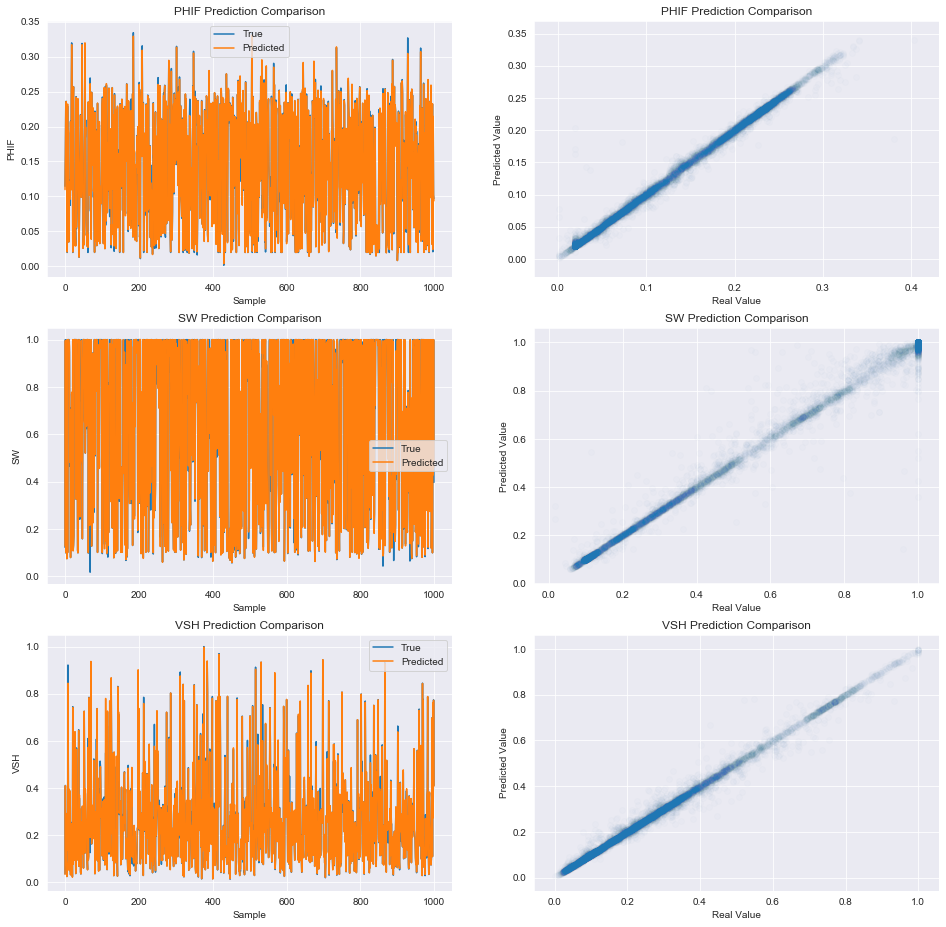

In [331]:
y_pred_val = RF_phi.predict(X_val[X_col])
result_plot(y_pred_val, y_val[y_col].to_numpy(), n_points=1000)

In [337]:
from sklearn.impute import SimpleImputer

In [338]:
test_data = np.array(test[X_col])

# Imputation transformer for completing missing values.
# You may try better ways to impute the missing values.
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
test_data = imp_mean.fit_transform(test_data)

# standize testing data
#X_test = scaler.transform(test_data)

In [339]:
y_pred_test = RF_phi.predict(test_data)
y_pred_test

array([[0.06879047, 1.        , 0.06474191],
       [0.08096556, 0.999957  , 0.0812318 ],
       [0.09163334, 0.994859  , 0.06635475],
       ...,
       [0.1792734 , 0.87939   , 0.15586767],
       [0.17742548, 0.887858  , 0.14762767],
       [0.16454752, 0.889487  , 0.164646  ]])